In [4]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn import decomposition
from matplotlib.backends.backend_pdf import PdfPages
import importlib
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
import umap

sys.path.append('..')
import catrace
from catrace import dataio
import catrace.process_time_trace as ptt
import catrace.plot_trace as pltr
import catrace.pattern_correlation as pcr
import catrace.exp_collection as ecl
import catrace.cluster as catclust
from catrace.frame_time import convert_sec_to_frame
from catrace.trace_dataframe import concatenate_planes
importlib.reload(catrace.plot_trace)
importlib.reload(ecl)
importlib.reload(pltr)
import catrace.frame_time as frame_time
import dataset_param as dtpar

In [2]:
exp_list = [( '2021-02-05-DpOBEM-JH9','phe-arg'),
            ('2021-03-18-DpOBEM-JH10','phe-arg'),
            ('2021-03-19-DpOBEM-JH10','phe-arg'),
            ('2021-04-02-DpOBEM-JH11','phe-arg'),
            ('2021-04-03-DpOBEM-JH11','phe-arg'),
            ('2021-05-01-DpOBEM-JH13','phe-arg'),
            ('2021-05-22-DpOBEM-JH14','phe-arg'),
            ('2021-07-15-DpOBEM-N2'  ,'naive'),
            ('2021-07-16-DpOBEM-N3' ,'naive'),
            ('2021-07-30-DpOBEM-JH17','arg-phe'),
            ('2021-07-31-DpOBEM-JH17','arg-phe'),
            ('2021-09-02-DpOBEM-JH18','arg-phe'),
            ('2021-09-03-DpOBEM-JH18','arg-phe'),
            ('2021-09-04-DpOBEM-JH18','arg-phe'),
            ('2021-09-15-DpOBEM-JH20','phe-arg'),
            ('2021-09-17-DpOBEM-JH20','phe-arg'),
            ('2021-09-18-DpOBEM-JH20','phe-arg'),
            ('2021-09-29-DpOBEM-JH21','arg-phe'),
            ('2021-10-01-DpOBEM-JH21','arg-phe'),
            ('2021-10-02-DpOBEM-JH21','arg-phe'),
            ('2021-11-10-DpOBEM-JH23','phe-trp'),
            ('2021-11-14-DpOBEM-JH23','phe-trp'),
            ('2021-11-24-DpOBEM-JH24','phe-trp'),
            ('2021-11-27-DpOBEM-JH24','phe-trp'),
            ('2021-11-26-DpOBEM-JH24','phe-trp'),
            ('2021-12-10-DpOBEM-N4','naive'),
            ('2021-12-31-DpOBEM-N7','naive'),
            ('2022-01-23-DpOBEM-N8','naive'),
            ('2022-01-30-DpOBEM-N9','naive'),
            ('2022-02-13-DpOBEM-N10','naive'),
            ('2022-02-20-DpOBEM-N11','naive')]


region_list = ['Dp', 'OB']
frame_rate = 30/4
#num_trial = 3
exp_info = dict(num_trial=3)
# TODO odor list bile acid order might be wrong!!
odor_list = ['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont']
#plane_nb_list = np.array([1,2,3,4]) - 1
data_root_dir = '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/'
dfovf_dict = dict()
load_data = False
if load_data:
    for region in region_list:
        dfovf_dict[region] = dict()
        for exp in exp_list:
            exp_name = exp[0]
            print(exp_name, region)
            dfovf_dict[region][exp_name] = ecl.load_dfovf(data_root_dir, exp_name, region)

In [5]:
os.getcwd()

'/home/hubo/Projects/Ca_imaging/scripts/catrace/notebooks'

In [66]:
region = 'Dp'
all_dfovf_select = pd.read_pickle('../../../results/JH_analysis/all_dfovf_select_{}.pkl'.format(region))

Plot averaged time course for each odor (used to determine the time window for computing tuning curve)

In [13]:
importlib.reload(ptt)
print(region)
if region =='OB':
    time_window = [5.5,11]
else:
    time_window = [5,7]   
frame_rate = 30/4
all_response = ptt.mean_pattern_in_time_window(all_dfovf_select, time_window, frame_rate)
all_response.to_pickle('../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
all_response

Dp


fish_id     2021-02-05-DpOBEM-JH9                                          \
plane                           0                                           
neuron                        0         1         2         3         5     
odor  trial                                                                 
phe   0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
      1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
      2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp   0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
      1                  0.098764  0.288644  0.048206  0.129740  0.178743   
      2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg   0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
      1                  0.069129  0.117999  0.238499  0.419269  0.127385   
      2                  0.017971  0.179629  0.189134  0.373900 -0.084077   
tdca  0                  0.055465  0.117861  0.071263 -0.057732  0.127823   
      1                  0.021753  0.089649 -0.086117 -0.004822 -0.021328   
      2                  0.075765  0.177125 -0.023670  0.316943  0.012088   
tca   0                  0.029793  0.113502  0.041647  0.120897  0.015454   
      1                  0.061789  0.046316  0.015583  0.064048  0.133865   
      2                  0.094398  0.015964 -0.001715 -0.047148  0.029763   
gca   0                 -0.062147 -0.072202 -0.056622  0.064611  0.056811   
      1                 -0.312422  0.081823  0.070302 -0.062725 -0.037224   
      2                  0.003238  0.111933  0.087542 -0.111042 -0.096473   
acsf  0                  0.129578  0.067252  0.113606  0.020651 -0.075632   
      1                  0.106135 -0.073797  0.018098  0.075378  0.125090   
      2                  0.164553  0.118102  0.104945  0.196501 -0.006301   
spont 0                  0.003318  0.107230  0.016274  0.087140  0.012023   
      1                  0.012960  0.026936 -0.073952 -0.121734 -0.027901   
      2                 -0.039621  0.006412 -0.098490 -0.204592  0.037356   

fish_id                                                        ...  \
plane                                                          ...   
neuron            6         7         11        16        21   ...   
odor  trial                                                    ...   
phe   0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
      1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
      2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp   0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
      1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
      2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg   0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
      1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
      2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   
tdca  0     -0.077840 -0.020798  0.098266  0.109144  0.045656  ...   
      1     -0.067299  0.038679 -0.030768  0.132517 -0.008783  ...   
      2     -0.078445  0.103355  0.056961 -0.014215  0.160220  ...   
tca   0     -0.133252  0.088258 -0.044862 -0.038487 -0.018844  ...   
      1      0.051403  0.103149  0.100475 -0.043041  0.059922  ...   
      2     -0.042293  0.114024  0.019450  0.101233  0.048663  ...   
gca   0      0.031446  0.085682 -0.075024 -0.078493 -0.037200  ...   
      1     -0.103984 -0.015952 -0.051851  0.009455 -0.064217  ...   
      2     -0.009670  0.017204  0.094498  0.088863 -0.051786  ...   
acsf  0      0.079401  0.060205  0.111486  0.047103 -0.052355  ...   
      1     -0.002489  0.144969  0.066520 -0.048894 -0.017864  ...   
      2      0.051380  0.041936  0.068314 -0.017184 -0.085874  ...   
spont 0     -0.102100  0.007573 -0.015216 -0.016987 -0.017427  ...   
      1      0.041594 -

In [90]:
region = 'OB'
all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))

In [91]:
import catrace.scale as catscale
from sklearn.cluster import KMeans, AgglomerativeClustering
H = catscale.standard_scale(all_response)
data = H.transpose()

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [92]:
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_order
cond_idx = train_cond.map(cond_order)
cond_idx

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='fish_id', length=28314)

In [95]:
fit = umap.UMAP(
        n_neighbors=200,
        min_dist=0.002)
u = fit.fit_transform(data);

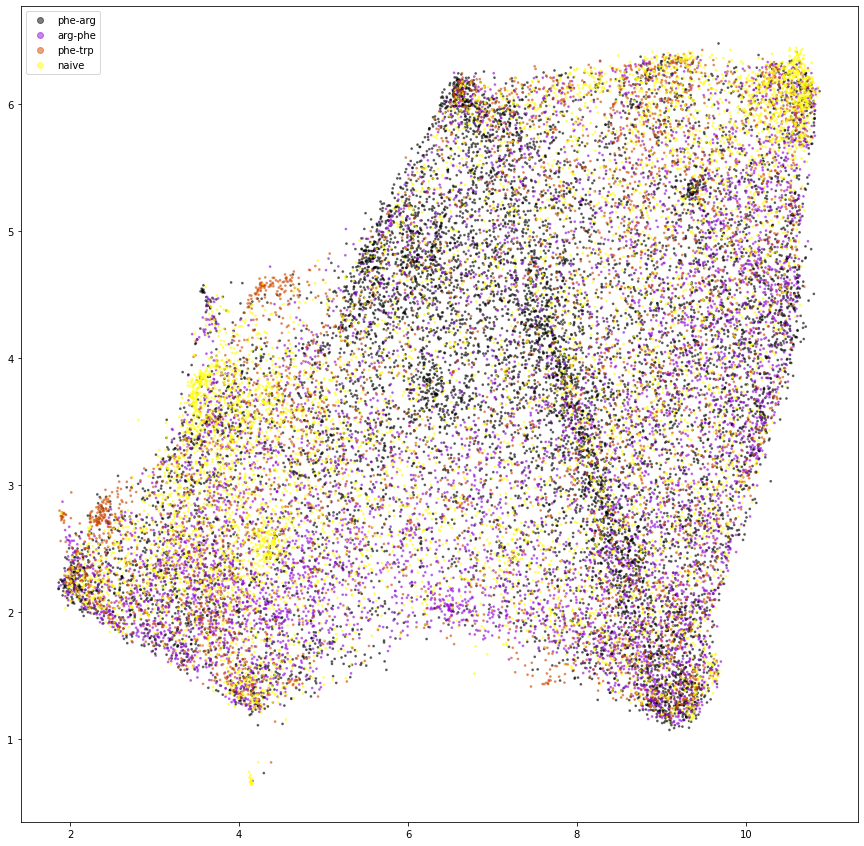

In [96]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(u[:,0], u[:,1], s=3, c=cond_idx, alpha=0.5, cmap='gnuplot')
ax.legend(handles=scatter.legend_elements()[0], labels=cond_list)

In [5]:
region = 'OB'
all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
import catrace.scale as catscale
from sklearn.cluster import KMeans, AgglomerativeClustering
H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_order
cond_idx = train_cond.map(cond_order)
fit = umap.UMAP(
        n_neighbors=50,
        min_dist=0,random_state=42)
u = fit.fit_transform(data);

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


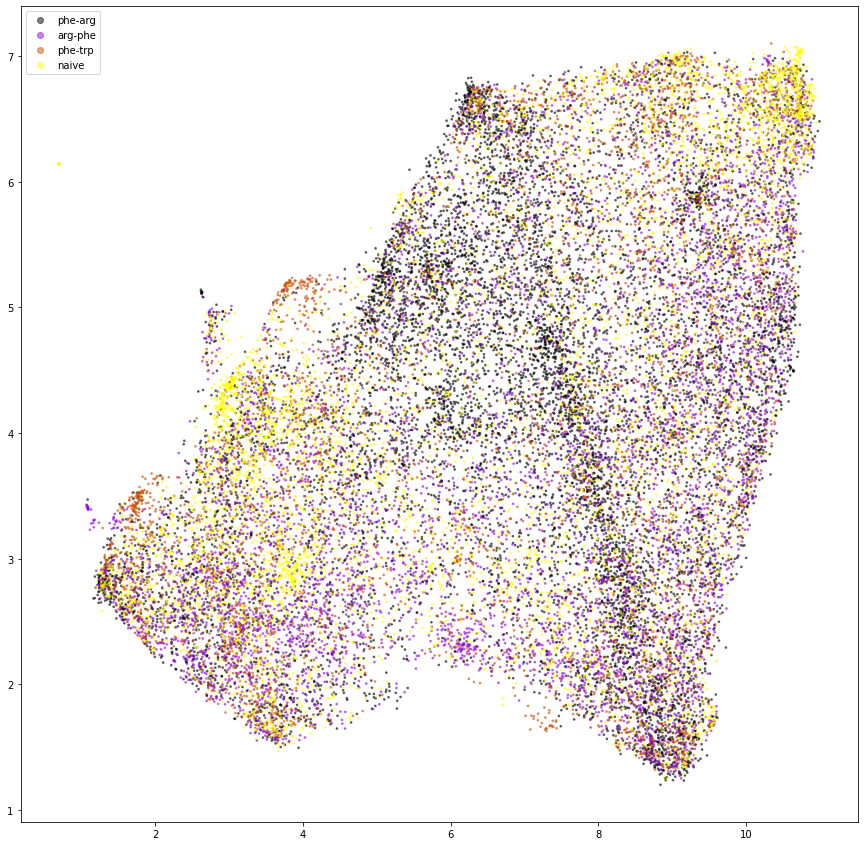

In [125]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(u[:,0], u[:,1], s=3, c=cond_idx, alpha=0.5, cmap='gnuplot')
ax.legend(handles=scatter.legend_elements()[0], labels=cond_list)

In [6]:
clusterable_embedding = umap.UMAP(
    n_neighbors=50,
    min_dist=0.0,
    n_components=8,
    random_state=42,
).fit_transform(data)

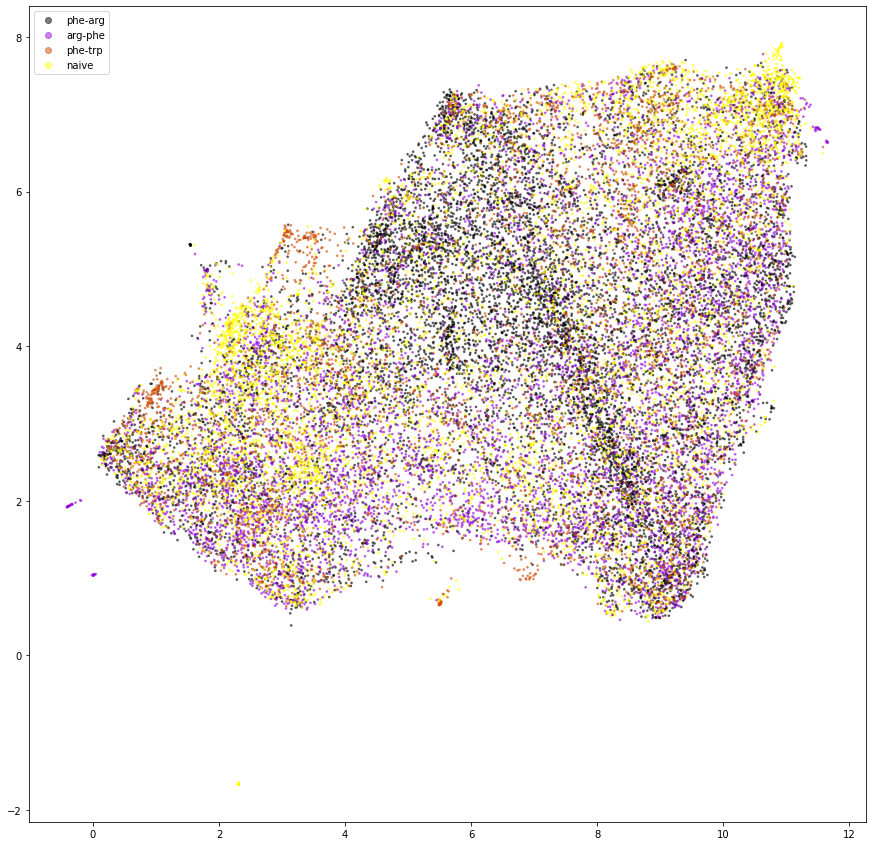

In [154]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(standard_embedding[:,0], standard_embedding[:,1], s=3, c=cond_idx, alpha=0.5, cmap='gnuplot')
ax.legend(handles=scatter.legend_elements()[0], labels=cond_list)

In [179]:
import hdbscan
labels = hdbscan.HDBSCAN(
    min_samples=80,
    min_cluster_size=50,
).fit_predict(clusterable_embedding)

In [166]:
np.unique(labels)

array([-1,  0,  1])

In [11]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(data)

In [12]:
def plot_label_on_umap(labels):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    clustered = (labels >= 0)
    plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.2,
            alpha=0.5)
    plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.2,
            cmap='Spectral');


In [7]:
clusterable_embedding.shape

(28314, 8)

In [8]:
import phenograph
import importlib
importlib.reload(phenograph)
communities, graph, Q = phenograph.cluster(clusterable_embedding)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.23398470878601074 seconds
Jaccard graph constructed in 2.3870410919189453 seconds
Wrote graph to binary file in 0.37865114212036133 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.904339
Louvain completed 21 runs in 8.995562076568604 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 12.300342082977295 seconds


In [14]:
np.unique(communities)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

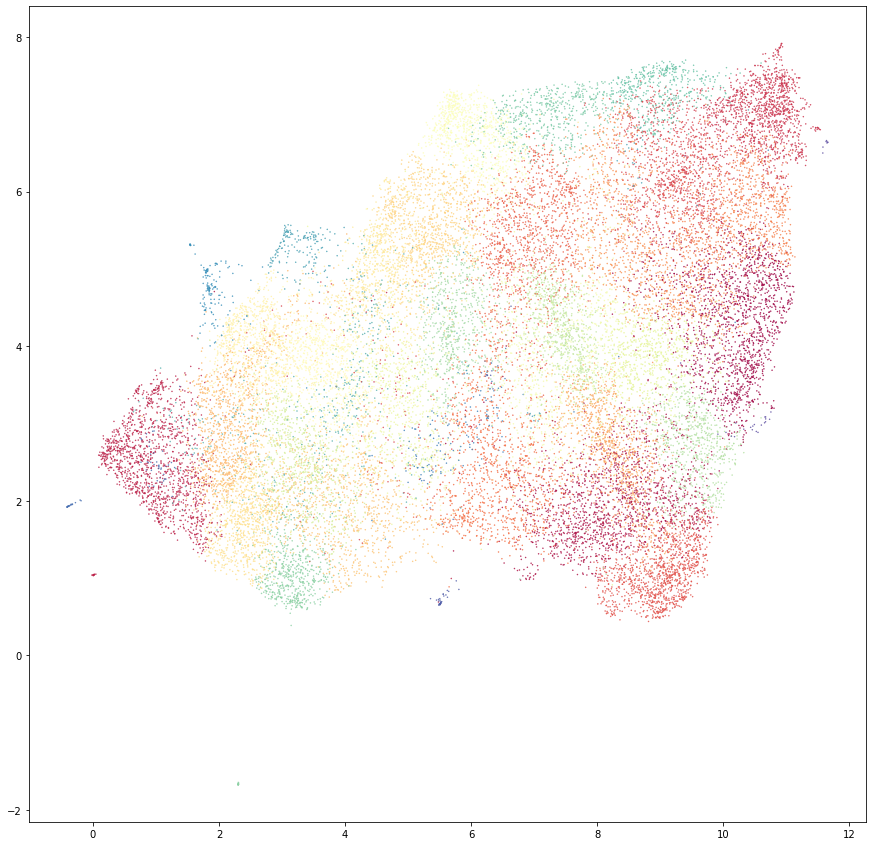

In [13]:
plot_label_on_umap(communities)

In [120]:
region = 'Dp'
all_response = pd.read_pickle('../../../results/JH_analysis/all_response_select_{}.pkl'.format(region))
import catrace.scale as catscale
from sklearn.cluster import KMeans, AgglomerativeClustering
H = catscale.standard_scale(all_response)
data = H.transpose()
fish_id = data.index.get_level_values('fish_id')
training_dict = dict(dtpar.exp_list)
train_cond= fish_id.map(training_dict)
cond_list = ['phe-arg', 'arg-phe', 'phe-trp', 'naive']
cond_order = {k: v for v, k in enumerate(cond_list)}
cond_order
cond_idx = train_cond.map(cond_order)
fit = umap.UMAP(
        n_neighbors=200,
        min_dist=0.000001,random_state=42)
u = fit.fit_transform(data);

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


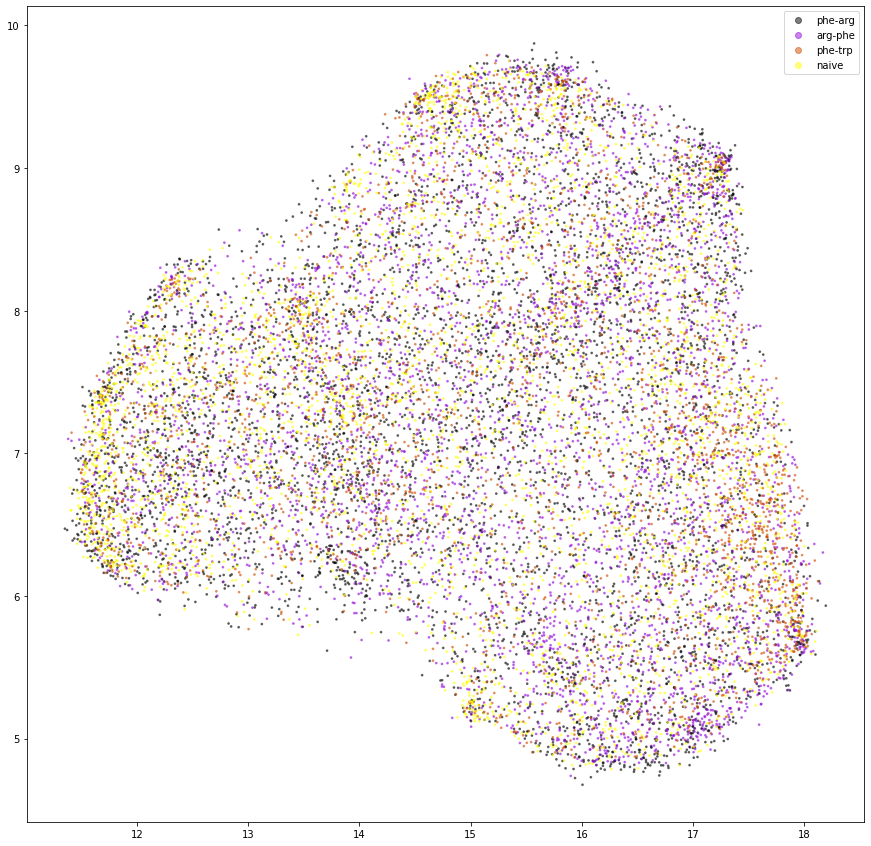

In [121]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(u[:,0], u[:,1], s=3, c=cond_idx, alpha=0.5, cmap='gnuplot')
ax.legend(handles=scatter.legend_elements()[0], labels=cond_list)

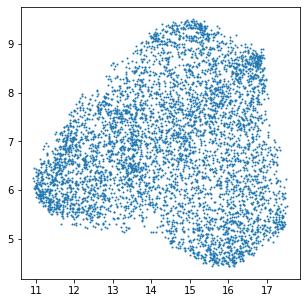

In [109]:
uu = u[cond_idx==0]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(uu[:,0], uu[:,1], s=1)

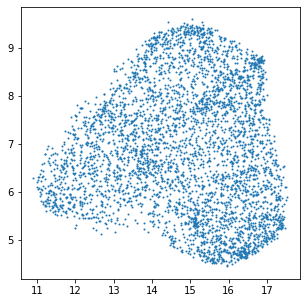

In [110]:
uu = u[cond_idx==1]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(uu[:,0], uu[:,1], s=1)

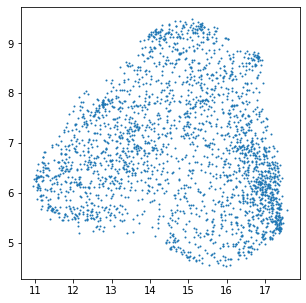

In [111]:
uu = u[cond_idx==2]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(uu[:,0], uu[:,1], s=1)

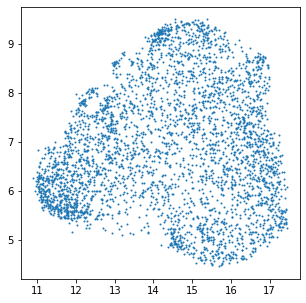

In [113]:
uu = u[cond_idx==3]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(uu[:,0], uu[:,1], s=1)